In [1]:
import numpy as np;
import pickle
import matplotlib.pyplot as plt;
from activations import NeuralNetworkUtils
import subprocess
import pickle


-----

## updating the parameters over single sample in a single epoch

-----

In [2]:
path = r"D:\USER DATA C DRIVE\Documents\Math Code\CodeChallenge Deep Learning\NN from scratch\__pycache__"
command = f'Remove-Item -Path "{path}" -Recurse -Force'
subprocess.run(["powershell", "-Command", command])

class NeuralNetwork(NeuralNetworkUtils):
    def __init__(self, input_size, hiddenlayer, output_neurons, activation_hidden, activation_output, loss_function, learning_rate):
        super().__init__()
        self.input_size = input_size
        self.no_neurons_per_hidden_layer = hiddenlayer
        self.no_of_neurons_output_layer = output_neurons
        self.activation_func_hidden, self.derivative_activation_func_hidden = self.get_activation_method(activation_hidden)
        self.activation_func_output, self.derivative_activation_func_output = self.get_activation_method(activation_output)
        self.loss_function, self.loss_func_derivative = self.get_loss_function(loss_function)
        self.learning_rate = learning_rate
        self.no_of_neurons = [self.input_size] + self.no_neurons_per_hidden_layer + [self.no_of_neurons_output_layer]
        self.W = [np.random.randn(self.no_of_neurons[i+1], self.no_of_neurons[i]) for i in range(len(self.no_of_neurons)-1)]
        self.b = [np.random.randn(self.no_of_neurons[i+1], 1) for i in range(len(self.no_of_neurons)-1)]

    def forwardpass(self, x_train):
        self.A = [x_train]
        self.Z = []
        for i in range(len(self.W) - 1):
            Z = self.W[i] @ self.A[-1] + self.b[i]
            self.Z.append(Z)
            A = self.activation_func_hidden(Z)
            self.A.append(A)
        
        Z = self.W[-1] @ self.A[-1] + self.b[-1]
        self.Z.append(Z)
        A = self.activation_func_output(Z)
        self.A.append(A)
        return self.A[-1]

    def backwardpass(self, y_true):
        output_delta = (self.loss_func_derivative(y_true, self.A[-1]) * self.derivative_activation_func_output(self.Z[-1]))
        output_delta = output_delta.reshape(-1, 1)
        dW = output_delta @ self.A[-2].T
        db = np.sum(output_delta, axis=1, keepdims=True)
        self.W[-1] -= self.learning_rate * dW
        self.b[-1] -= self.learning_rate * db
        
        delta = output_delta
        for i in range(len(self.W) - 2, -1, -1):
            delta = ((self.W[i + 1].T @ delta) * self.derivative_activation_func_hidden(self.Z[i]))
            delta = delta.reshape(-1, 1)
            dW = delta @ self.A[i].T
            db = np.sum(delta, axis=1, keepdims=True)
            self.W[i] -= self.learning_rate * dW
            self.b[i] -= self.learning_rate * db

    def train(self, x_batch, y_true, epochs=1000):
        loss_values = []
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(len(x_batch)):
                x = x_batch[i].reshape(-1, 1)
                y = y_true[i].reshape(-1, 1)
                y_pred = self.forwardpass(x)
                loss = self.loss_function(y, y_pred)
                epoch_loss += loss
                self.backwardpass(y)
            loss_values.append(epoch_loss / len(x_batch))
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {epoch_loss / len(x_batch)}")
        return loss_values
    
    def save_model(self, file_path):
        model_params = {
            'W': self.W,
            'b': self.b
        
        }
        with open(file_path, 'wb') as f:
            pickle.dump(model_params, f)

    def load_model(self, file_path):
        with open(file_path, 'rb') as f:
            model_params = pickle.load(f)
        
        self.W = model_params['W']
        self.b = model_params['b']

------


## Neural Network used for linear regression


-----

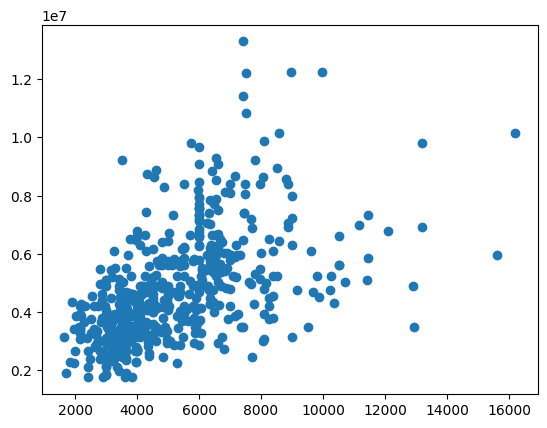

In [3]:
import pandas as pd;

df = pd.read_csv("./data set/Housing.csv")

X = df["area"]

Y = df["price"]


plt.scatter(X,Y)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = np.array(X).reshape(-1,+1)

y_train = np.array(Y).reshape(-1,+1)

x_train = scaler.fit_transform(x_train.reshape(-1, 1))
y_train = scaler.fit_transform(y_train.reshape(-1, 1))


In [14]:
NN = NeuralNetwork(
    input_size=1,
    hiddenlayer=[16,16,16],
    output_neurons=1,
    activation_hidden="linear",
    activation_output="linear",
    learning_rate=1e-9,
    loss_function="mse"
    
)


NN.load_model(r"models\linear.pkl")

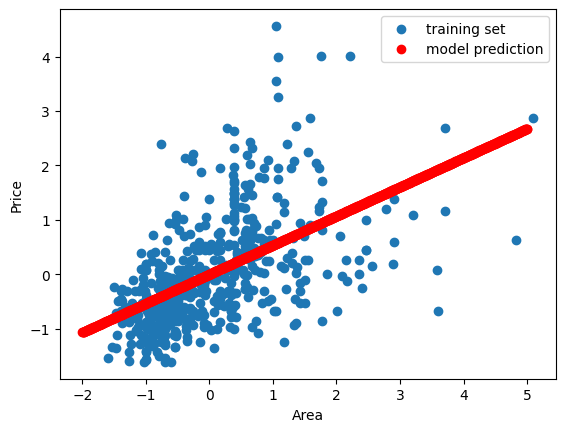

In [15]:
plt.scatter(x_train,y_train,label="training set")
plt.xlabel("Area")
plt.ylabel("Price")
xx = np.linspace(-2,5,1000)
for i in range(len(xx)):
    x = xx[i].reshape(-1,1)
    y = NN.forwardpass(x)
    plt.plot(x,y,"ro",label="model prediction" if i == 0 else None)

plt.legend()
plt.show()    
    
    